# Try Clustering with MNIST data images generated with different frequencies

In [72]:
from ReadData import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans

In [107]:
def readData(path):
    data = getEMData(path)
    target = []
    field = []
    freq = []

    for i in range(0, len(data)):
        target.append(data[i].target)
        field.append(data[i].Esct.real)
        freq.append(data[i].freq)

    field = np.array(field)
    target = np.array(target)
    freq = np.array(freq)

    return field, target, freq

In [3]:
field3Fixed, target3Fixed, freq3Fixed = readData("./3FreqTest/")

Read 600 samples


In [4]:
field3Fixed.shape

(600, 24, 24)

In [110]:
# os.chdir("D:/UManitoba/Terms/Fall 2023/Data 4010/Python Script/20FreqInRange")

In [113]:
fieldRange, targetRange, freqRange = readData("./20FreqInRange/")

Read 1000 samples


In [257]:
[fieldRange.shape,field3Fixed.shape]

[(1000, 24, 24), (600, 24, 24)]

In [5]:
field_f_train, field_f_test, target_f_train, target_f_test, freq_f_train, freq_f_test = train_test_split(
    field3Fixed, target3Fixed, freq3Fixed, test_size=0.20, random_state=42)

In [7]:
field_r_train, field_r_test, target_r_train, target_r_test, freq_r_train, freq_r_test = train_test_split(
    fieldRange, targetRange, freqRange, test_size=0.20, random_state=42)

In [266]:
[field_f_test.shape, field_r_test.shape, field_f_train.shape, field_r_train.shape]

[(120, 576), (200, 576), (480, 576), (800, 576)]

In [8]:
field_f_train = field_f_train.reshape(len(field_f_train),-1)
field_f_test = field_f_test.reshape(len(field_f_test),-1)

field_r_train = field_r_train.reshape(len(field_r_train),-1)
field_r_test = field_r_test.reshape(len(field_r_test),-1)

In [265]:
def getKmeans(num_clusters, train_data):
    # Initialize the K-Means model
    kmeans = MiniBatchKMeans(n_clusters = num_clusters)
    # Fitting the model to training set
    kmeans.fit(train_data)
    return kmeans

In [267]:
total_clusters = 3
kmeansFixed = getKmeans(total_clusters, field_f_train)
kmeansRange = getKmeans(total_clusters, field_r_train)

In [268]:
centroidsFixed = kmeansFixed.cluster_centers_.reshape(total_clusters,24,24)
centroidsFixed.shape

(3, 24, 24)

In [269]:
centroidsRange = kmeansRange.cluster_centers_.reshape(total_clusters,24,24)
centroidsRange.shape

(3, 24, 24)

Plot all centroids

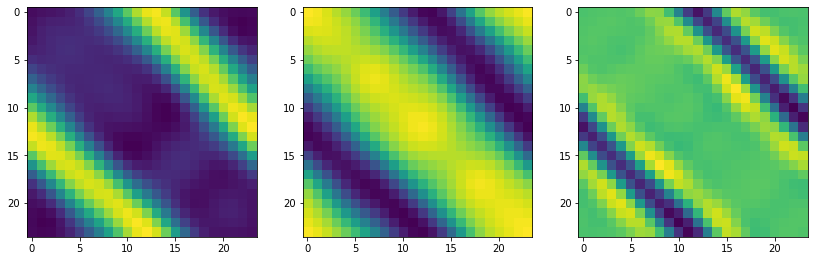

In [270]:
plt.figure(figsize = (14,14))
for index, img in enumerate(centroidsRange):
    plt.subplot(1,len(centroidsRange),index+1)
    plt.imshow(img)
    # plt.axis('off')

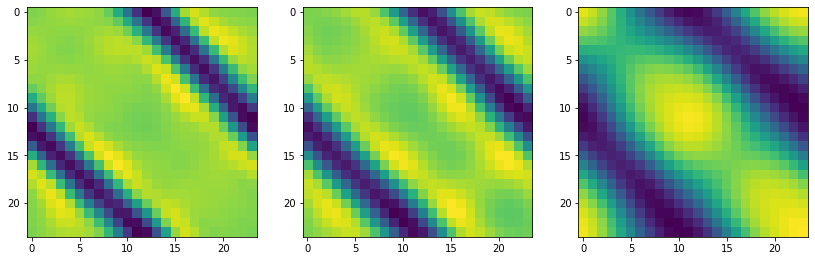

In [271]:
plt.figure(figsize = (14,14))
for index, img in enumerate(centroidsFixed):
    plt.subplot(1,len(centroidsFixed),index+1)
    plt.imshow(img)
    # plt.axis('off')

Plot 10 images from each clusters

In [272]:
def getClusters(KMeans, field, freq, printFreq = False, printAvgFreq = False):
    clustered_images = {}
    clustered_freq = {}
    labels = KMeans.labels_
    for i, label in enumerate(labels):
        if label not in clustered_images:
            clustered_images[label] = []
            clustered_freq[label] = []
        clustered_images[label].append(field[i].reshape(24,24,))  # Add the image to the corresponding cluster
        clustered_freq[label].append(freq[i])
    
    
    if (printFreq|printFreq):
        for i in range(0, len(clustered_images)):
            s = 'Cluster ' + str(i) + ' has ' + str(len(clustered_images[i])) + ' images'
            if printAvgFreq:
                s += ', frequency average = ' + str(pd.Series(clustered_freq[i]).mean()) 
            if printFreq:
                s += ', frequency = ' + str(pd.Series(clustered_freq[i]).sort_values().drop_duplicates().tolist())               
            print(s)
            
    return clustered_images, clustered_freq

Clusters Overview

In [273]:
cluster_img_f, cluster_freq_f = getClusters(kmeansFixed, field_f_train, freq_f_train, True)

Cluster 0 has 222 images, frequency = [2000000000.0, 3000000000.0]
Cluster 1 has 89 images, frequency = [2000000000.0]
Cluster 2 has 169 images, frequency = [1000000000.0, 2000000000.0, 3000000000.0]


In [274]:
cluster_img_r, cluster_freq_r = getClusters(kmeansRange, field_r_train, freq_r_train, True, True)

Cluster 0 has 322 images, frequency average = 1903439789.5576973, frequency = [1486643673.2509823, 1508419770.9520519, 1626329957.741413, 1718124824.9219885, 1736582845.413857, 1759944419.9761372, 2211640324.201805, 2609395600.413849, 2658504813.093726, 2773168588.89079]
Cluster 1 has 287 images, frequency average = 1563452139.4154818, frequency = [1024315065.9022788, 1060265887.9016674, 1154111303.4882607, 1241216345.4471998, 1909387814.0672317, 2146047496.831007, 2173691535.358155, 2211640324.201805, 2958357993.646558]
Cluster 2 has 191 images, frequency average = 2682290272.361136, frequency = [1024315065.9022788, 1759944419.9761372, 1909387814.0672317, 2658504813.093726, 2773168588.89079, 2842299494.516277, 2877813610.3444653, 2958357993.646558]


Plot Centroids and Clusters

In [275]:
def view_img(images, row, col, size):
    plt.figure(figsize = (size,size))
    # gets the list of filenames for a cluster
    # only allow up to 30 images to be shown at a time
    if len(images) > 10:
        images = images[:10]
    # plot each image in the cluster
    for index, img in enumerate(images):
        plt.subplot(row,col,index+1)
        plt.imshow(img)


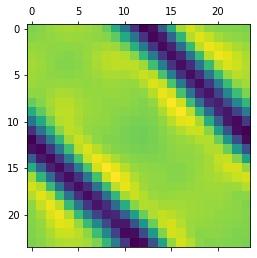

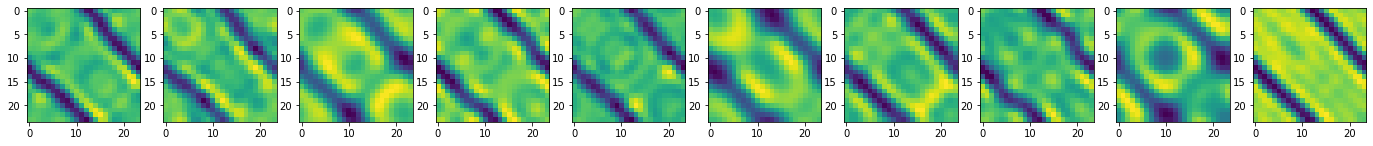

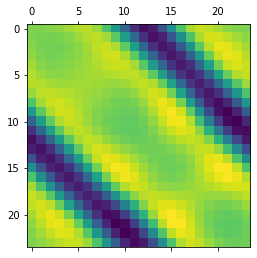

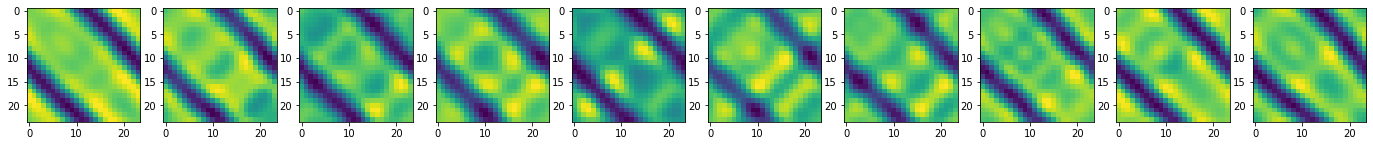

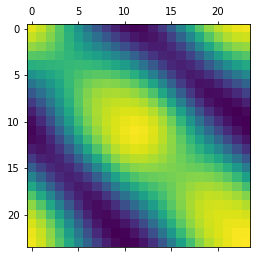

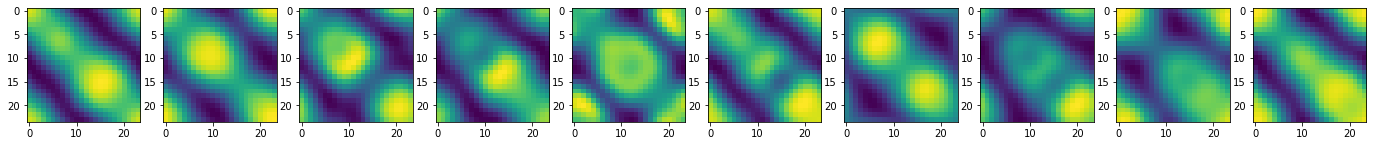

In [276]:
#Fixed Frequency
for i in range(0, len(cluster_img_f)):   
    plt.matshow(centroidsFixed[i])
    view_img(cluster_img_f[i],1,10,24)

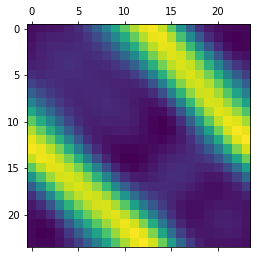

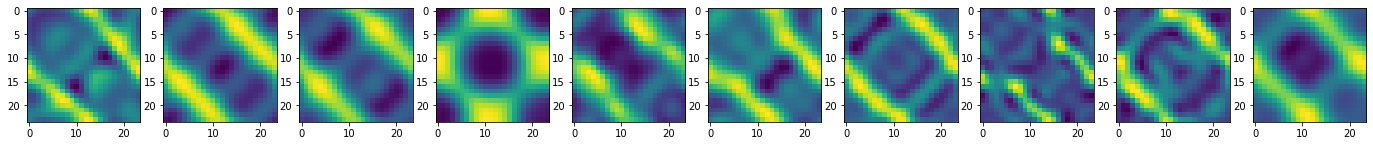

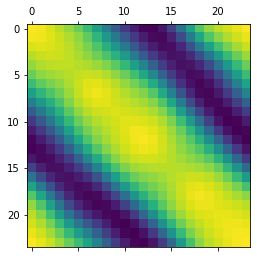

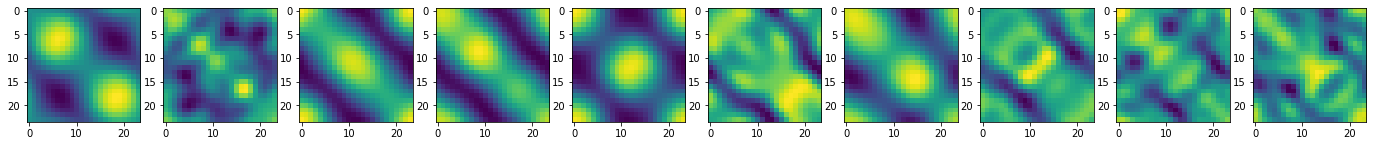

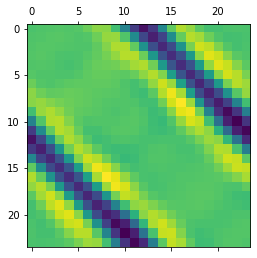

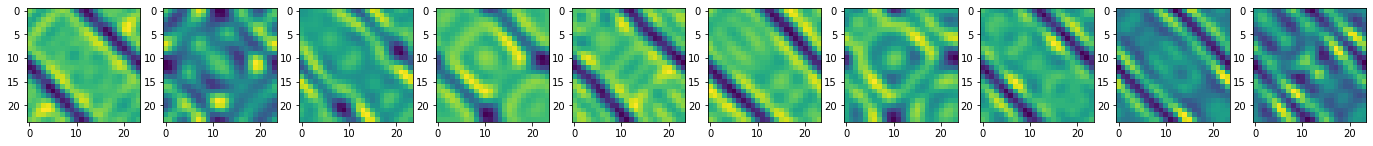

In [277]:
#Frequencies in Range
for i in range(0, len(cluster_img_r)):   
    plt.matshow(centroidsRange[i])
    view_img(cluster_img_r[i],1,10,24)

Predict clusters on the test set

In [304]:
def getPrediction(field_test, Kmeans):
    predicted_cluster = Kmeans.predict(field_test)

    field_test_for_plot = {}
    labels = predicted_cluster
    test_img = []
    for i, label in enumerate(labels):
        if label not in field_test_for_plot:
            field_test_for_plot[label] = []
        field_test_for_plot[label].append(field_test[i].reshape(24,24,))  # Add the image to the corresponding cluster

    return field_test_for_plot, predicted_cluster

In [305]:
predImgFixed, predLabelFixed = getPrediction(field_f_test, kmeansFixed)
predImgRange, predLabelRange = getPrediction(field_r_test, kmeansRange)

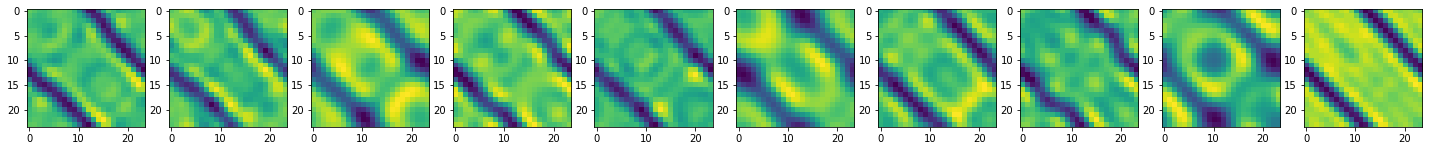

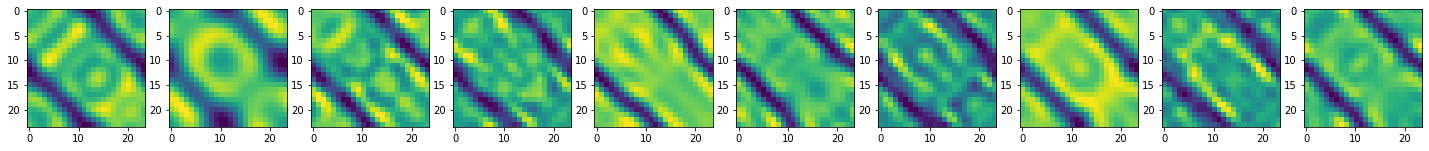

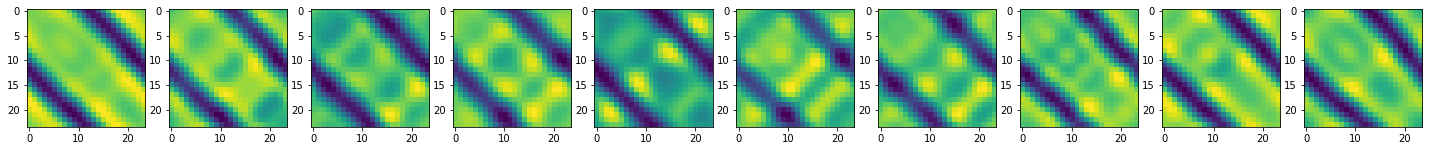

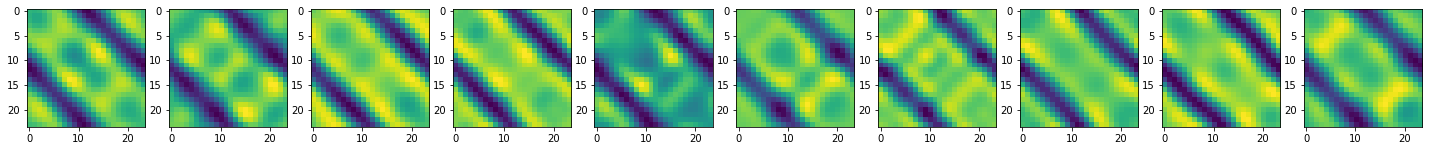

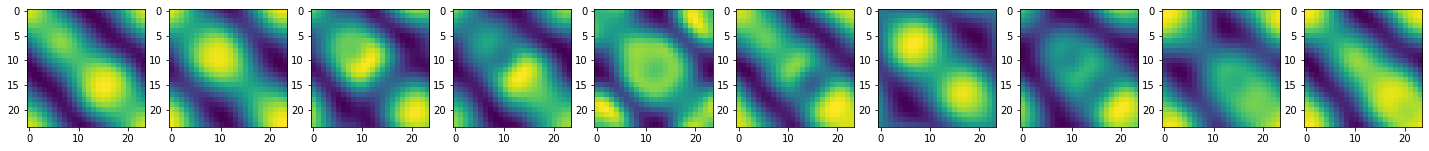

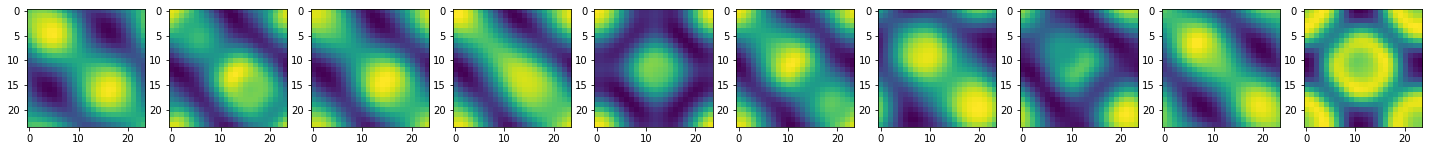

In [281]:
for i in range(len(predImgFixed)):
    view_img(cluster_img_f[i],1,10,25)#test clusters
    view_img(predImgFixed[i], 1, 10,25)#train clusters

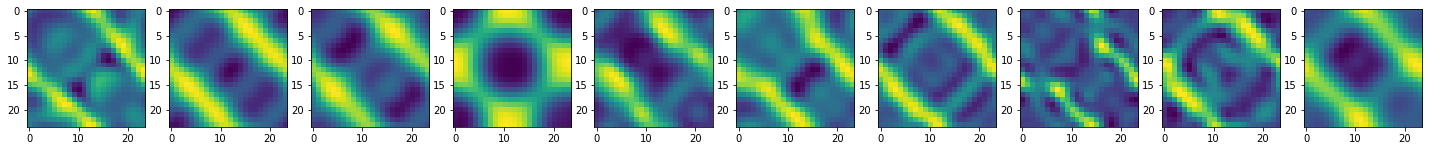

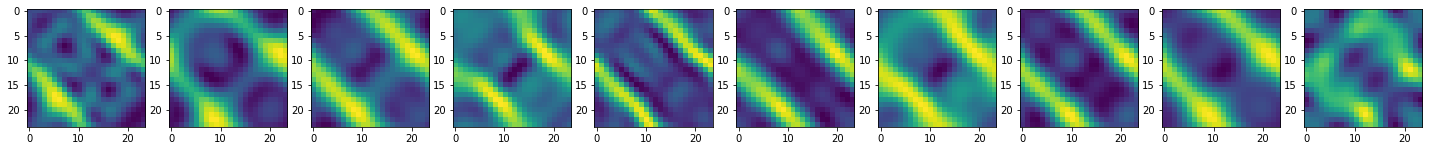

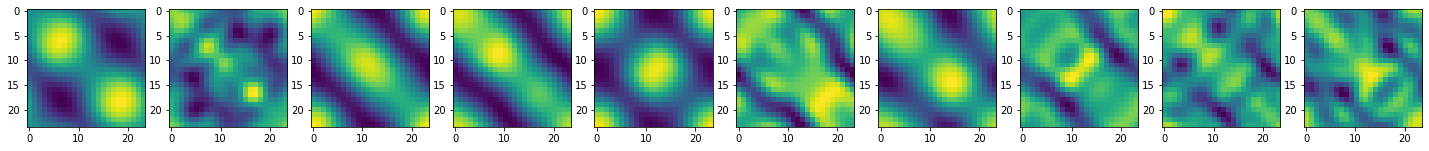

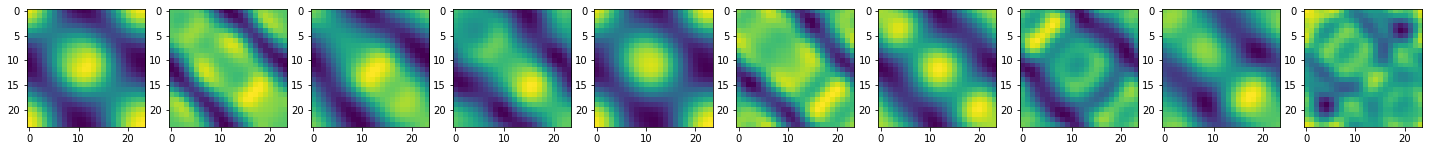

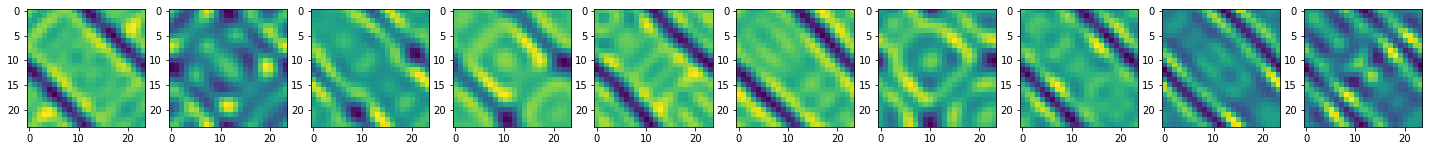

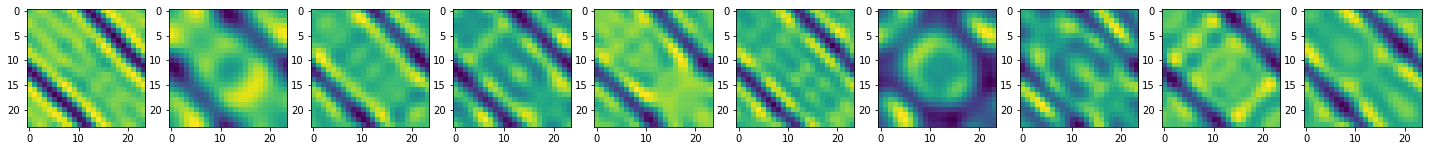

In [282]:
for i in range(len(predImgRange)):
    view_img(cluster_img_r[i],1,10,25)#test clusters
    view_img(predImgRange[i], 1, 10,25)#train clusters

# Evaluation

Silhouette Score: Measures how well-separated the clusters are. Ranges from -1 to 1, where a high value indicates well-defined clusters.

In [346]:
from sklearn.metrics import silhouette_score

# silhouette_avg_f = silhouette_score(field_f_train, kmeansFixed.labels_)
# silhouette_avg_r = silhouette_score(field_r_train, kmeansRange.labels_)

silhouette_avg_f = silhouette_score(field_f_test, predLabelFixed)
silhouette_avg_r = silhouette_score(field_r_test, predLabelRange)

[silhouette_avg_f,silhouette_avg_r]

[0.2700608673777817, 0.38923495871627084]

In [161]:
# Ratio of the between-cluster variance to the within-cluster variance. Higher values indicate better-defined clusters.
# from sklearn.metrics import calinski_harabasz_score

# ch_score_f = calinski_harabasz_score(field_f_train, kmeansFixed.labels_)
# ch_score_r = calinski_harabasz_score(field_r_train, kmeansRange.labels_)

# [ch_score_f, ch_score_r]

[186.68666167353462, 807.6760205056487]

In [166]:
# Measures the compactness and separation of clusters. Lower values indicate better clustering.
# from sklearn.metrics import davies_bouldin_score

# db_index_f = davies_bouldin_score(field_f_train, kmeansFixed.labels_)
# db_index_r = davies_bouldin_score(field_r_train, kmeansRange.labels_)

# [db_index_f,db_index_r]

## Try Enhanced Learning with VGG16

In [176]:
import tensorflow as tf
import os
from keras.utils import load_img
from keras.applications.vgg16 import preprocess_input 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [177]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [74]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = np.array(load_img(file, target_size=(224,224)))
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [171]:
path = "D:/UManitoba/Terms/Fall 2023/Data 4010/Python Script/FreqInRangeImg/"
os.chdir(path)

In [101]:
path = "D:/UManitoba/Terms/Fall 2023/Data 4010/Python Script/FreqInRangeImg/"
os.chdir(path)

imgs = []

with os.scandir(path) as files:
    for file in files:
        if file.name.endswith('.png'):
            imgs.append(file.name)

In [103]:
img = np.array(load_img(imgs[5], target_size=(224,224)))
img.reshape(1,224,224,3).shape

(1, 224, 224, 3)

In [105]:
# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)
data = {}
# lop through each image in the dataset
for i in imgs:
    feat = extract_features(i,model)
    data[i] = feat

1/1 [==============================] - 0s 342ms/step


In [114]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)

In [115]:
# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=576, random_state=22) #24*24=576
pca.fit(feat)
x = pca.transform(feat)

# cluster feature vectors
kmeans = KMeans(n_clusters=3, random_state=22)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=22)

In [116]:
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [178]:
from matplotlib import pyplot as plt

# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (24,24))
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 10 images to be shown at a time
    if len(files) > 10:
        files = files[:9]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(1,10,index+1)
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

In [118]:
[len(groups[0]),len(groups[1]),len(groups[2])]

[260, 341, 399]

In [125]:
groups[0][0].split('_')[2].split('.')[0]

'0'

In [165]:
def extract_num(string):
    return int(string.split('_')[2].split('.')[0])

def get_freq(grp):
    frequency = {}
    for i in range(0,len(grp)):
        frequency[i] = []
        nums = list(filter(lambda x: x is not None,map(extract_num, grp[i])))   
        frequency[i] = freqRange[nums]
    return frequency


In [166]:
frequency = get_freq(groups)

In [167]:
[sum(frequency[0])/len(frequency[0]), sum(frequency[1])/len(frequency[1]), sum(frequency[2])/len(frequency[2])]

[1552618103.596735, 2646974582.3055525, 1672967490.7685263]

In [173]:
groups[0]

['field_pic_0.png',
 'field_pic_1.png',
 'field_pic_10.png',
 'field_pic_101.png',
 'field_pic_103.png',
 'field_pic_111.png',
 'field_pic_112.png',
 'field_pic_116.png',
 'field_pic_117.png',
 'field_pic_12.png',
 'field_pic_132.png',
 'field_pic_135.png',
 'field_pic_136.png',
 'field_pic_137.png',
 'field_pic_138.png',
 'field_pic_140.png',
 'field_pic_141.png',
 'field_pic_142.png',
 'field_pic_145.png',
 'field_pic_149.png',
 'field_pic_150.png',
 'field_pic_151.png',
 'field_pic_157.png',
 'field_pic_158.png',
 'field_pic_160.png',
 'field_pic_166.png',
 'field_pic_167.png',
 'field_pic_168.png',
 'field_pic_170.png',
 'field_pic_172.png',
 'field_pic_173.png',
 'field_pic_177.png',
 'field_pic_178.png',
 'field_pic_19.png',
 'field_pic_210.png',
 'field_pic_214.png',
 'field_pic_226.png',
 'field_pic_230.png',
 'field_pic_231.png',
 'field_pic_232.png',
 'field_pic_233.png',
 'field_pic_234.png',
 'field_pic_236.png',
 'field_pic_238.png',
 'field_pic_239.png',
 'field_pic_240.p

In [179]:
view_cluster(0)
view_cluster(1)
view_cluster(2)

ImportError: DLL load failed while importing _backend_agg: The specified module could not be found.

In [ ]:
# which value for k might be the best 
sse = []
list_k = list(range(1, 1000, 10))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)   
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

In [ ]:
sse = []
list_k = list(range(1, 200))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)   
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(x, kmeans.labels_)

In [48]:
# cluster feature vectors
kmeans = KMeans(n_clusters=25, random_state=22)
kmeans.fit(x)

(120, 576)

In [ ]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)
for i in range(len(groups)):
    view_cluster(i)

In [ ]:
silhouette_score(x, kmeans.labels_)

In [36]:
# from numpy import newaxis

In [49]:
reshaped_train = field_f_train.reshape(480,24,24,1)
reshaped_test = field_f_test.reshape(120,24,24,1)

reshaped_test.shape

(120, 24, 24, 1)

In [67]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(24, 24, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output before the dense layers
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

# Output layer for clustering (assuming 10 clusters, adjust as needed)
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 22, 22, 32)        320       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 2, 2, 128)         73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 1, 1, 128)        0

In [69]:
history = model.fit(reshaped_train, reshaped_train, epochs=10, validation_data=(reshaped_test, reshaped_test))

Epoch 1/10


ValueError: in user code:

    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 24, 24, 1) and (32, 10) are incompatible


In [46]:
encoder = Model(input_img, encoded)

In [55]:
encoder.compile(optimizer='adadelta', loss='mse')
encoder.fit(reshaped_train, reshaped_train, epochs=50, 
            batch_size=256, 
            shuffle=True, 
            validation_data=(reshaped_test, reshaped_test))

Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/mean_squared_error/BroadcastGradientArgs' defined at (most recent call last):
    File "c:\Program Files\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Program Files\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 976, in launch_instance
      app.start()
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Program Files\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "c:\Program Files\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "c:\Program Files\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\admin\AppData\Local\Temp\ipykernel_1536\1054312527.py", line 2, in <cell line: 2>
      encoder.fit(reshaped_train, reshaped_train, epochs=50,
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 893, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 537, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 590, in _compute_gradients
      grads_and_vars = self._get_gradients(tape, loss, var_list, grad_loss)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 471, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/mean_squared_error/BroadcastGradientArgs'
Incompatible shapes: [256,256] vs. [256,24,24,1]
	 [[{{node gradient_tape/mean_squared_error/BroadcastGradientArgs}}]] [Op:__inference_train_function_2068]

In [66]:
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense
from keras.models import Model
from keras import backend as K
from sklearn.cluster import KMeans
from keras import metrics
from keras.datasets import mnist
from sklearn.preprocessing import normalize

# Load your dataset or use a sample dataset like MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and reshape the input data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

from keras.losses import mean_squared_error

def custom_loss(y_true, y_pred):
    return mean_squared_error(y_true, K.reshape(y_pred, (-1, 28, 28, 1)))

input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
encoded = Dense(256, activation='relu')(x)

encoder = Model(input_img, encoded)

# Use the custom loss function
encoder.compile(optimizer='adadelta', loss=custom_loss)

# Continue with training
encoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))


# # Get the encoded representations of the images
# encoded_imgs = encoder.predict(x_test)

# # Normalize the encoded representations
# encoded_imgs = normalize(encoded_imgs, axis=1, norm='l2')

# # Use KMeans for clustering
# kmeans = KMeans(n_clusters=10)
# kmeans.fit(encoded_imgs)

# # Predict cluster labels
# cluster_labels = kmeans.predict(encoded_imgs)

# # Print cluster labels
# print(cluster_labels)


Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node 'custom_loss/Reshape' defined at (most recent call last):
    File "c:\Program Files\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Program Files\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 976, in launch_instance
      app.start()
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Program Files\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "c:\Program Files\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "c:\Program Files\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\admin\AppData\Local\Temp\ipykernel_1536\343386942.py", line 38, in <cell line: 38>
      encoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\admin\AppData\Local\Temp\ipykernel_1536\343386942.py", line 21, in custom_loss
      return mean_squared_error(y_true, K.reshape(y_pred, (-1, 28, 28, 1)))
    File "C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\keras\backend.py", line 3344, in reshape
      return tf.reshape(x, shape)
Node: 'custom_loss/Reshape'
Input to reshape is a tensor with 65536 values, but the requested shape requires a multiple of 784
	 [[{{node custom_loss/Reshape}}]] [Op:__inference_train_function_4491]

In [ ]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from keras.utils import load_img
from keras.applications.vgg16 import preprocess_input 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# from random import randint
import pandas as pd


In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [ ]:
path = "D:/UManitoba/Terms/Fall 2023/Data 4010/Python Script/FreqInRangeImg"
# change the working directory to the path where the images are located
# os.chdir(path)

# this list holds all the image filename
imgs = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            imgs.append(file.name)

In [ ]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [ ]:
img = np.array(load_img(imgs[0], target_size=(224,224)))
img.reshape(1,224,224,3).shape

(1, 224, 224, 3)

In [ ]:
# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

In [ ]:
data = {}
# lop through each image in the dataset
for i in imgs:
    feat = extract_features(i,model)
    data[i] = feat


1/1 [==============================] - 0s 197ms/step


In [ ]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)

In [ ]:
# # get the unique labels (from the flower_labels.csv)
# df = pd.read_csv('flower_labels.csv')
# label = df['label'].tolist()
# unique_labels = list(set(label))

# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

# cluster feature vectors
kmeans = KMeans(n_clusters=3, random_state=22)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=22)

In [ ]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (24,24))
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 10 images to be shown at a time
    if len(files) > 10:
        files = files[:9]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(1,10,index+1)
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

In [ ]:
[len(groups[0]),len(groups[1]),len(groups[2])]

[260, 403, 337]

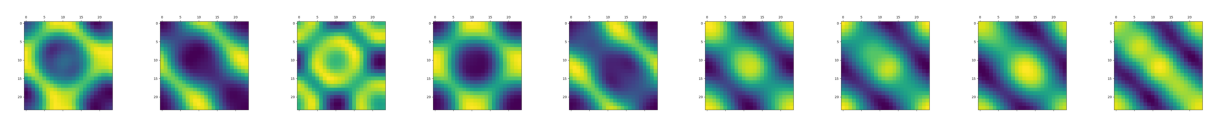

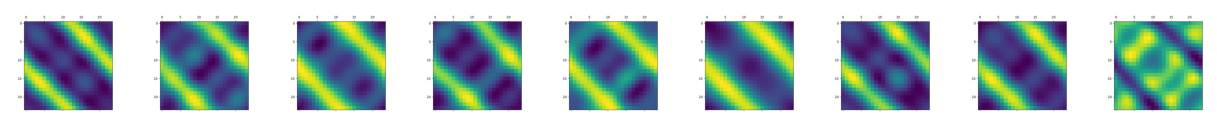

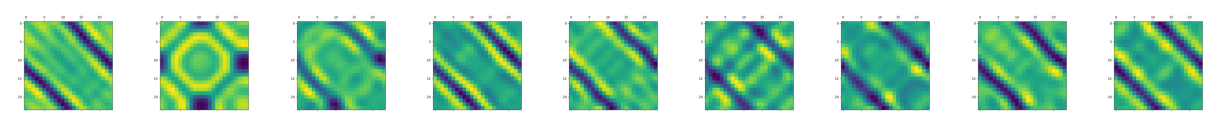

In [ ]:
view_cluster(0)
view_cluster(1)
view_cluster(2)

Text(0, 0.5, 'Sum of squared distance')

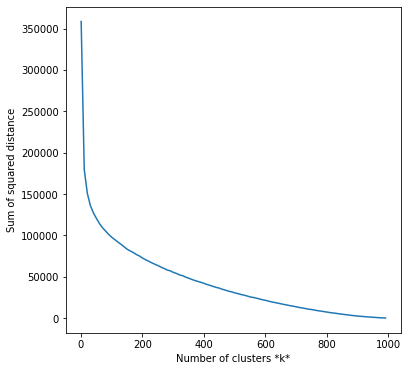

In [ ]:
# this is just incase you want to see which value for k might be the best 
sse = []
list_k = list(range(1, 1000, 10))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)   
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

Text(0, 0.5, 'Sum of squared distance')

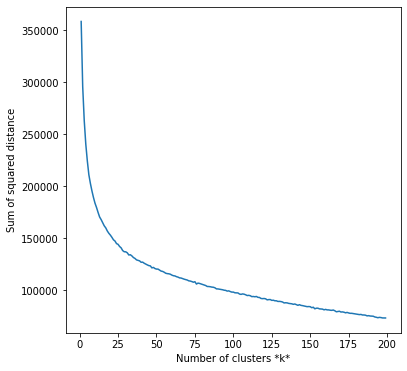

In [ ]:
# this is just incase you want to see which value for k might be the best 
sse = []
list_k = list(range(1, 200))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)   
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(x, kmeans.labels_)

0.15286444

In [ ]:
# cluster feature vectors
kmeans = KMeans(n_clusters=25, random_state=22)
kmeans.fit(x)

KMeans(n_clusters=25, random_state=22)

In [ ]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

C:\Users\admin\AppData\Local\Temp\ipykernel_18572\3288089646.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (24,24))


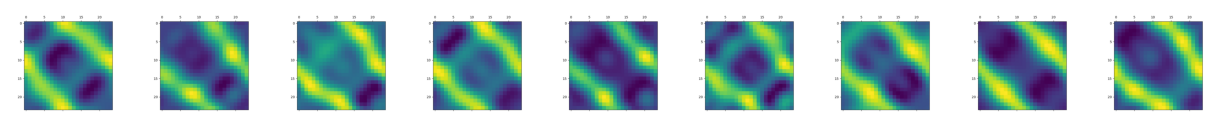

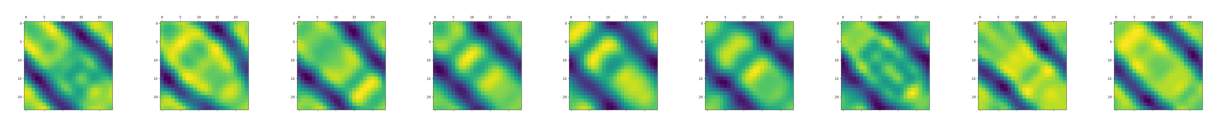

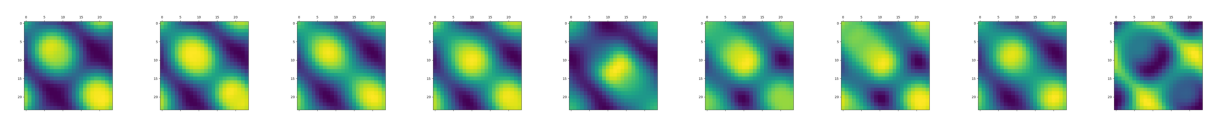

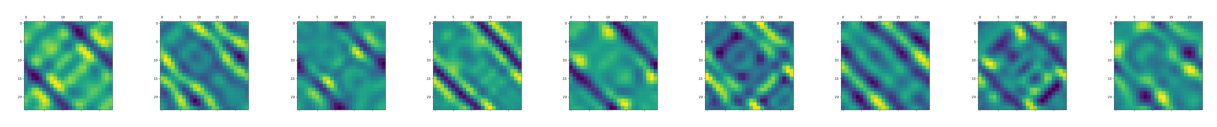

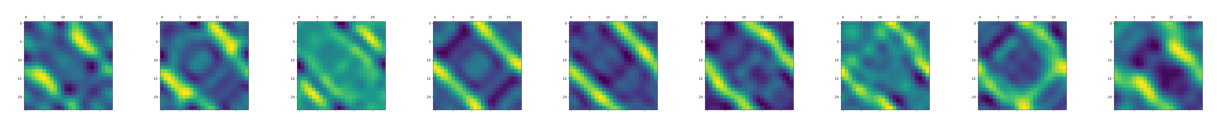

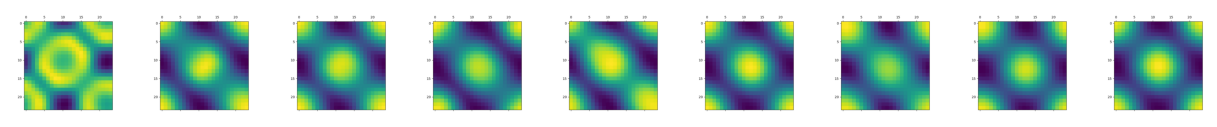

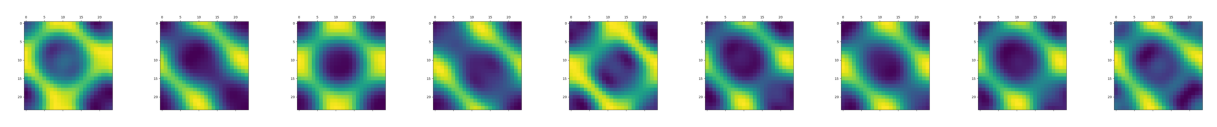

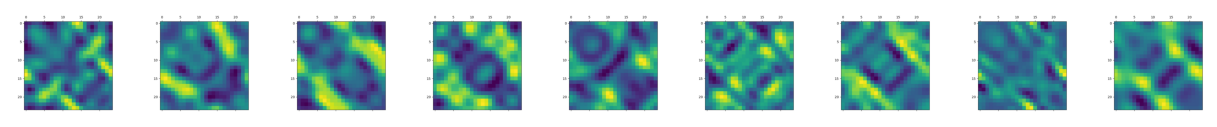

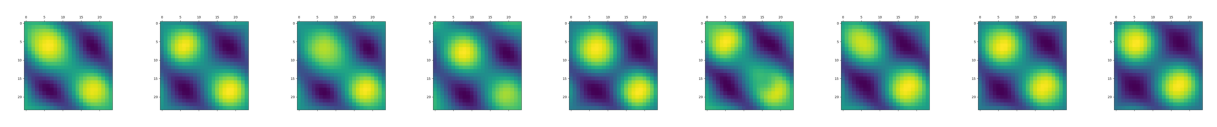

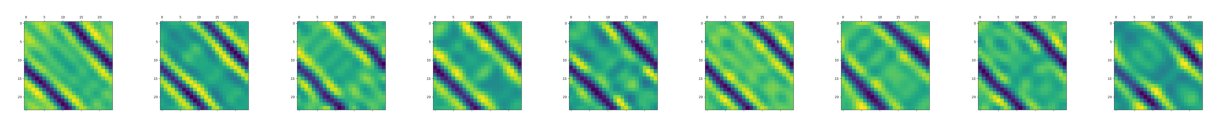

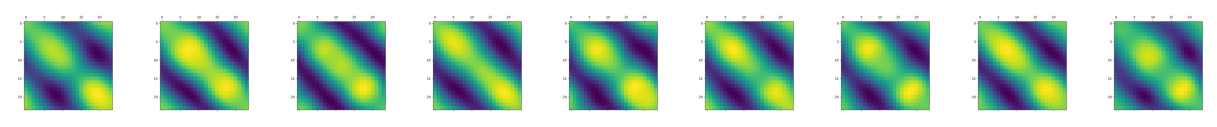

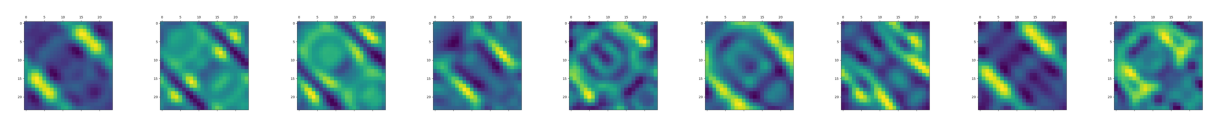

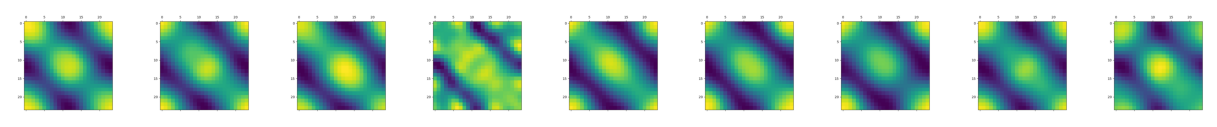

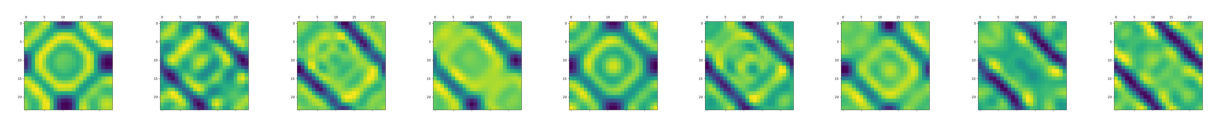

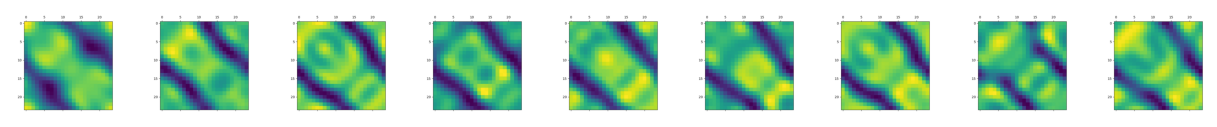

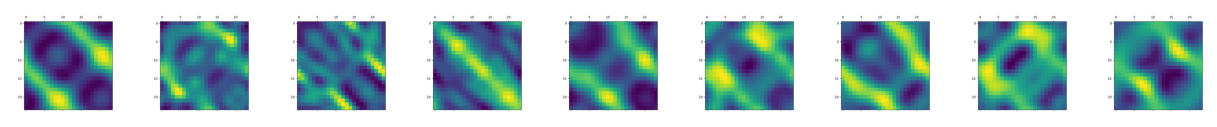

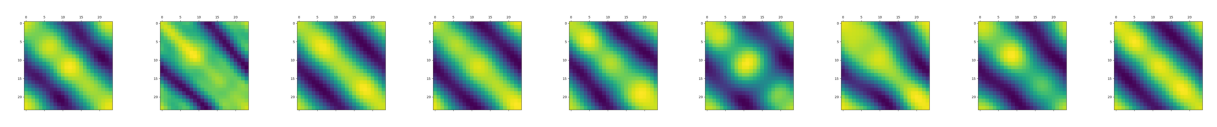

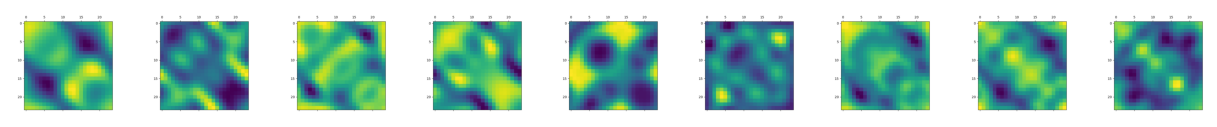

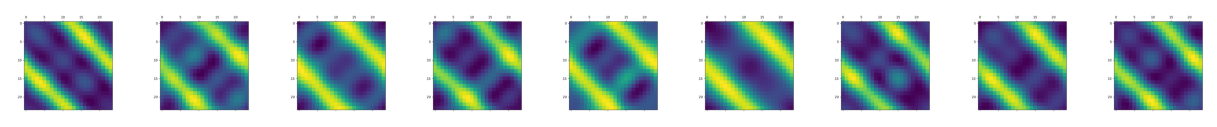

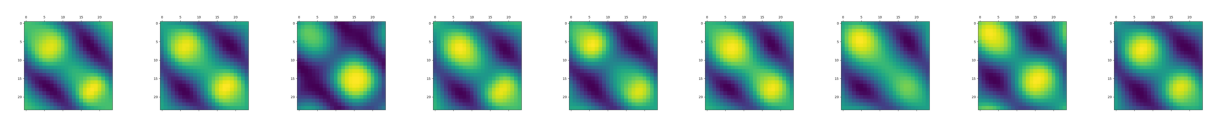

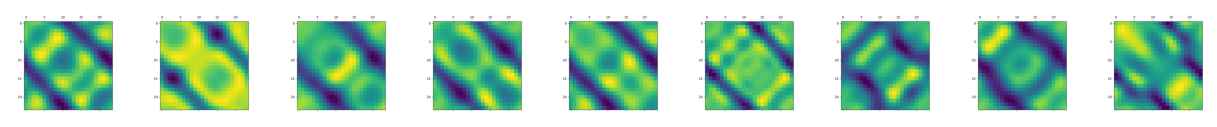

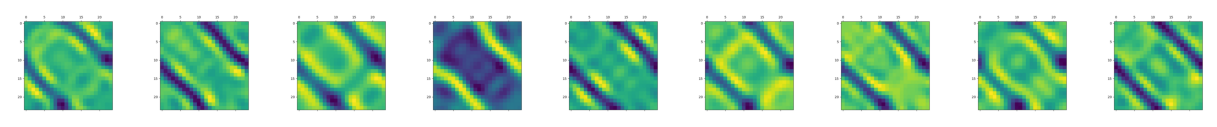

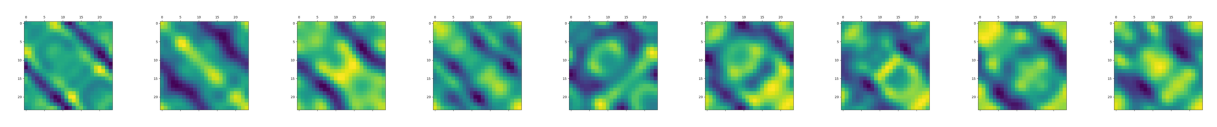

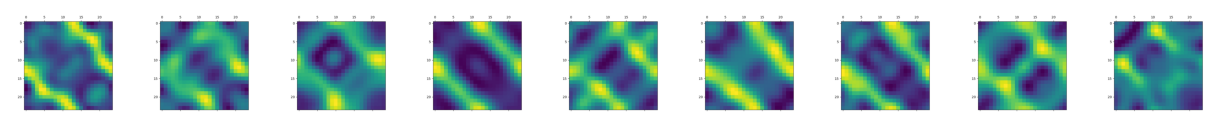

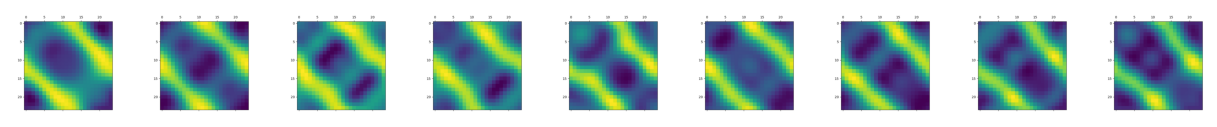

In [ ]:
for i in range(len(groups)):
    view_cluster(i)

In [ ]:
silhouette_score(x, kmeans.labels_)

0.10749808